In [141]:
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
adult = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=',', skipinitialspace=True, names=['age','workclass','final_weight','education','education','mstatus','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','money'],header = None)
adult

,age,workclass,final_weight,education,education.1,mstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


1. How many males and females are there?

In [189]:
adult.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education.1',
       'mstatus', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'money'],
      dtype='object')

In [190]:
adult["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

2. What is the mean male age?


In [191]:
adult.groupby("sex")['age'].agg(['mean'])

,mean
sex,
Female,36.858230
Male,39.433547


In [192]:
adult[adult['sex'] == 'Male'].groupby('sex')['age'].mean()

sex
Male    39.433547
Name: age, dtype: float64

3. What is the proportion of the US citizens?


In [193]:
adult[adult['native-country'] == 'United-States'].shape[0]/adult.shape[0]

0.895857006848684

4. Plot the distribution of people’s education as a bar plot.


<BarContainer object of 16 artists>

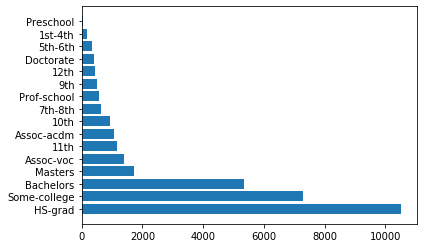

In [194]:
plt.barh(adult["education"].value_counts().index, adult["education"].value_counts().values)

5. What is the mean and standard deviation of the ”ﬁnal weight” for divorced people?


In [195]:
print("mean-")
print(adult[adult['mstatus'] == 'Divorced']['final_weight'].mean())
print("std-")
print(adult[adult['mstatus'] == 'Divorced']['final_weight'].std())


mean-
185802.79045689848
std-
105646.78945933603


6. Is it true that the people who receive over 50k are mostly highly educated?


In [196]:
moneyadult=adult[adult["money"]==">50K"]
highly_educated=moneyadult[moneyadult["education"].isin(['Bachelors',"Masters","Doctorate"])]
print(highly_educated.shape[0]/moneyadult.shape[0]>0.7)
#я посчитал, что highly educated-'Bachelors',"Masters","Doctorate", а mostly-  >0.7

False


7. What is the maximum male and female age for each race?


In [197]:
adult.groupby(["race","sex"])["age"].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

8. The people from which countries work as farmers/ﬁshers?


In [198]:
adult[adult['occupation'] == 'Farming-fishing']['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?


In [199]:
men = adult[adult['sex'] == 'Male']
women = adult[adult['sex'] == 'Female']
print('male=',end='')
print(len(men[men['education'] == 'Bachelors'])/len(men[men['education'] == 'Masters']))
print('female=',end='')
print(len(women[women['education'] == 'Bachelors']) /len(women[women['education'] == 'Masters']))

male=3.14743049705139
female=3.0205223880597014


10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?


In [200]:
print('largest=',adult['hours-per-week'].max())

largest= 99


In [201]:
adult[adult['hours-per-week'] == 99].shape[0]

85

In [202]:
adult[adult['hours-per-week'] == 99]['money'].value_counts()

<=50K    60
>50K     25
Name: money, dtype: int64